In [4]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [106]:
ds_test = pd.read_csv('train.csv')
# ds_test = pd.read_csv('test.csv')

In [116]:
# data = ds_train.values
data = ds_test.values[:, 1:]
labels = ds_test.values[:, 0]
print labels.shape
print data.shape
# means = np.mean(data[:, :], axis=0)
# cm = np.cov(data[:, :], rowvar=0)

data_std = (data - data.mean(axis=0))/(data.std(axis=0)+1e-03)
print data_std.shape

# mean_std = np.mean(data_std, axis=0)
# cm_std = np.cov(data_std, rowvar=0)

(42000,)
(42000, 784)
(42000, 784)


In [22]:
print mean_std[:10]
print cm_std[120:125, 120:125]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 0.99996664  0.80112268  0.56703557  0.40000529  0.28095423]
 [ 0.80112268  0.99998481  0.83354413  0.59697117  0.41309186]
 [ 0.56703557  0.83354413  0.99999548  0.83747834  0.59783897]
 [ 0.40000529  0.59697117  0.83747834  1.00000228  0.83537695]
 [ 0.28095423  0.41309186  0.59783897  0.83537695  1.00000676]]


In [23]:
eig_val_cm, eig_vec_cm = np.linalg.eig(cm)
eig_val_std, eig_vec_std = np.linalg.eig(cm_std)

In [30]:
print eig_val_cm[:5]
print eig_val_std[:5]

[ 333767.61789515+0.j  244771.26666388+0.j  211038.83434473+0.j
  186314.44403161+0.j  167023.03228781+0.j]
[ 40.40277806  29.02058082  27.01005154  20.81004038  18.17692652]


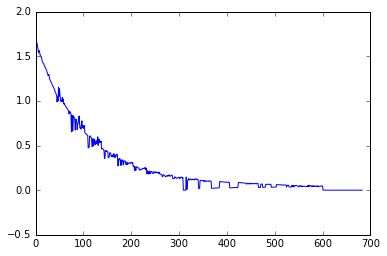

In [34]:
plt.figure(0)
plt.plot(eig_val_std[100:])
plt.show()

In [37]:
eig_cm = np.cumsum(eig_val_std)/np.sum(eig_val_std)
print eig_cm.shape

(784,)


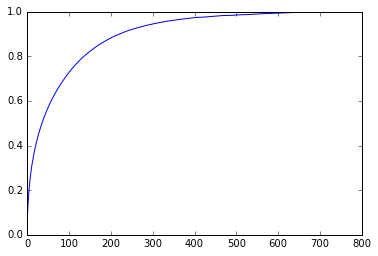

In [38]:
plt.figure(0)
plt.plot(eig_cm)
plt.show()

In [40]:
for ix in range(eig_cm.shape[0]):
    if eig_cm[ix] >= 0.98:
        print ix
        break

452


In [47]:
print eig_vec_std.shape

(784, 784)


In [41]:
eig_pairs = [(np.abs(eig_val_std[i]), eig_vec_std[:,i])
             for i in range(len(eig_val_std))]
eig_pairs.sort(key=lambda x:x[0])
eig_pairs.reverse()

3.64037662809e-17


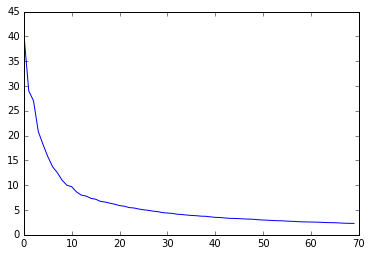

In [50]:
vals = np.zeros(len(eig_pairs))
for ix in range(len(eig_pairs)):
    vals[ix] = eig_pairs[ix][0]
print vals[700]
plt.plot(vals[:70])
plt.show()

525


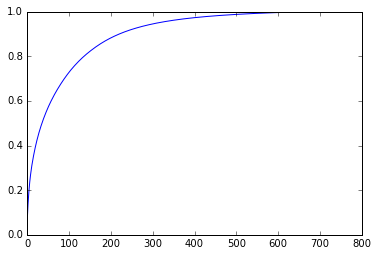

In [56]:
eig_cm = np.cumsum(vals)/np.sum(vals)


for ix in range(eig_cm.shape[0]):
    if eig_cm[ix] >= 0.99:
        print ix
        break


plt.plot(eig_cm)
plt.show()

In [65]:
a = np.asarray([1, 2, 3, 4, 5])
print a.T
b = a.reshape((a.shape[0], 1))
print b
print b.shape

[1 2 3 4 5]
[[1]
 [2]
 [3]
 [4]
 [5]]
(5, 1)


In [63]:
# select k dimensions out of all dimensions for feature space
k = 442
d = eig_pairs[0][1].shape[0]
selected = []

for ix in range(k):
    selected.append(eig_pairs[ix][1].reshape(d, 1))

# Now stack the selected eigenvectors in W matrix
mat_W = np.hstack(selected)
print mat_W.shape

(784, 442)


In [73]:
print mat_W.shape
print data_std.T.shape
y = data_std.dot(mat_W)
print y.shape

(784, 442)
(784, 28000)
(28000, 442)


In [76]:
import sklearn
from sklearn.decomposition import PCA

In [108]:
pca = PCA(n_components=2)

X = pca.fit_transform(data_std)
print X.shape

(42000, 2)


In [82]:
trans_cm = np.cov(X, rowvar=0)

In [96]:
v = pca.explained_variance_ratio_
cs = np.cumsum(v)/np.sum(v)

0.0991070072632


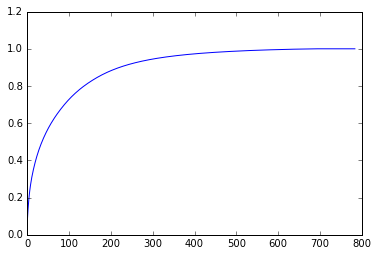

In [102]:
print cs[1]
plt.plot(cs)
plt.show()

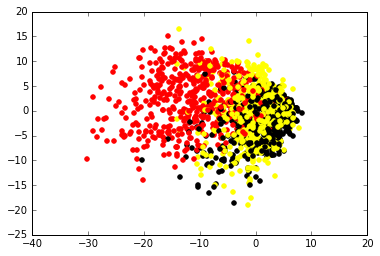

In [111]:
for ix in range(5000):
    if labels[ix] == 0:
        plt.scatter(X[ix, 0], X[ix, 1], color='red')
    elif labels[ix] == 1:
        pass
        # plt.scatter(X[ix, 0], X[ix, 1], color='green')
    elif labels[ix] == 2:
        pass
        # plt.scatter(X[ix, 0], X[ix, 1], color='blue')
    elif labels[ix] == 3:
        plt.scatter(X[ix, 0], X[ix, 1], color='yellow')
    elif labels[ix] == 4:
        plt.scatter(X[ix, 0], X[ix, 1], color='black')
plt.show()

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
dim = [2, 3, 5, 7, 10]# , 20, 50, 128, 256, 314, 442]
acc = []

In [121]:
for ix in dim:
    pca = PCA(n_components=ix)
    X = pca.fit_transform(data)
    split = int(0.8*data_std.shape[0])
    X_train = X[:split, :]
    X_test = X[split:, :]
    y_train = labels[:split]
    y_test = labels[split:]
    
    rf = RandomForestClassifier(n_estimators=40, random_state=31)
    rf.fit(X_train, y_train)
    
    acc.append(rf.score(X_test, y_test))
print acc

[0.33500000000000002, 0.53619047619047622, 0.7522619047619048, 0.89773809523809522, 0.92880952380952386, 0.93928571428571428, 0.93392857142857144, 0.92523809523809519, 0.92154761904761906, 0.91690476190476189, 0.42142857142857143, 0.50011904761904757, 0.74464285714285716, 0.90440476190476193, 0.94261904761904758, 0.94488095238095238, 0.93869047619047619, 0.92761904761904757, 0.92249999999999999, 0.90654761904761905]


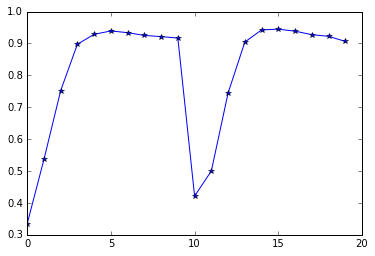

In [122]:
plt.plot(acc, '*-')
plt.show()